# Principal Component Analysis

In this repository we will attempt to apply principal component analysis to 

## 0. Imports & Data

In [8]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [9]:
df = pd.read_csv("../../data/rb_tx_data.csv")
df = df.set_index("TransactionID")

df = df.replace(np.nan,0)

df = df.loc[(df['TotalCost']>0) & 
            (df['RepairCost']>0) &
            (df['TurnaroundTime']>0) &
            (df['TurnaroundTime']<38) 
            ]

X = df.loc[:, df.columns[14:] ].values
X = StandardScaler().fit_transform(X)


# 1. Implemention

We take the singular value decomposition of the feature matrix to get our principal components :)

In [10]:
U, sigma, V_T = np.linalg.svd(X)

In [54]:
# Variance described by each prinicpal component is given by the quotient of that respective eigvenalue and the trace of S
# note that the trace of S is equivalent to the sum of the eigenvalues
pc_variance = sigma **2 / (sigma**2).sum()

As some repairs are never used in this dataset, some components end up with 0 variance. Let's remove those for clarity.

In [55]:
nonzero_components = np.argwhere(pc_variance > 1e-16)
print(f"Filtering {len(pc_variance) - len(nonzero_components)} zero variance components")
pc_variance = pc_variance[nonzero_components]

Filtering 11 zero variance components


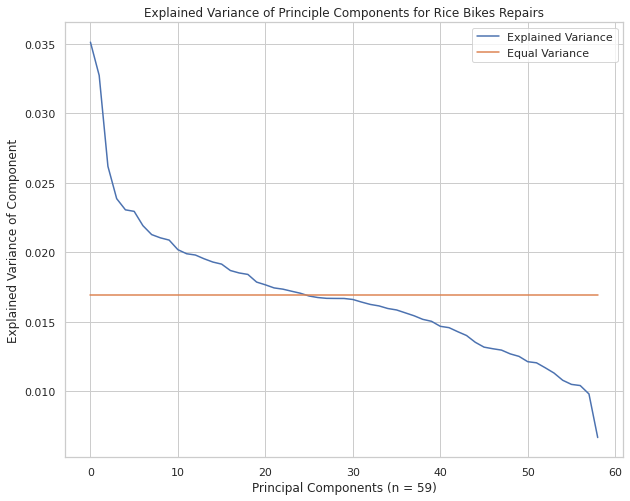

In [57]:
sns.set(style="whitegrid")
PCs = range(len(pc_variance))
plt.figure(figsize=(10,8))
plt.plot(PCs, pc_variance, label="Explained Variance")
plt.plot(PCs, np.ones(len(pc_variance))/len(pc_variance), label="Equal Variance")
plt.xlabel(f"Principal Components (n = {len(pc_variance)})")
plt.ylabel("Explained Variance of Component")
plt.title("Explained Variance of Principle Components for Rice Bikes Repairs")
plt.legend()

The first 3 or 4 principal compoents do explain significantly more variance as compared to the remainder. However, the magnitude of the maximum explained variance is only about 2x a theoretical equal variance across all components. This suggests that the capacity for dimensionality reduction is minimal with 59 startin components.

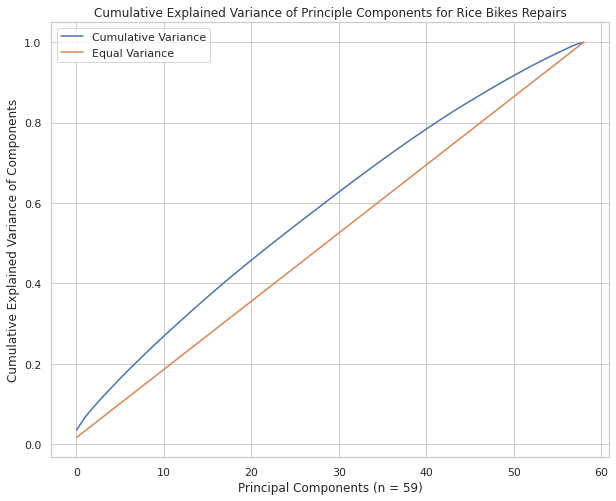

In [59]:
cumulative_pc_variance = np.cumsum(pc_variance)
sns.set(style="whitegrid")
plt.figure(figsize=(10,8))
plt.plot(PCs, cumulative_pc_variance, label="Cumulative Variance")
plt.plot(PCs, (np.array(PCs)+1) * (1/len(pc_variance)), label="Equal Variance")
plt.xlabel(f"Principal Components (n = {len(pc_variance)})")
plt.ylabel("Cumulative Explained Variance of Components")
plt.title("Cumulative Explained Variance of Principle Components for Rice Bikes Repairs")
plt.legend()

Furthermore, the cumulative explained variance does not deviate significantly from a theoretical equal variance set of components. For instance, if you want to explain 80% of the original dataset's variance, you can do so with approximately 41/42 principal components, while equal variance components would require around 47. While this is an improvement, it is unlikely that the repair dta can be embedded in a significantly smaller affine space than it original resides.